In [97]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [81]:
train_dir = '../input/rock-paper-scissor/rps/rps'
test_dir = '../input/rock-paper-scissor/rps-test-set/rps-test-set'
classes = os.listdir(train_dir)

In [82]:
X_train_val = []
y_train_val = []
X_test = []
y_test = []
for i, cls in enumerate(os.listdir(train_dir)):
    for img in os.listdir(os.path.join(train_dir, cls)):
        image = cv2.imread(os.path.join(train_dir,cls,img),cv2.IMREAD_GRAYSCALE)
        X_train_val.append(image)
        y_train_val.append(i)

for i, cls in enumerate(os.listdir(test_dir)):
    for img in os.listdir(os.path.join(test_dir, cls)):
        image = cv2.imread(os.path.join(test_dir,cls,img),cv2.IMREAD_GRAYSCALE)
        X_test.append(image)
        y_test.append(i)


In [83]:
X_test = np.array(X_test)
X_train_val = np.array(X_train_val)

y_test = np.array(y_test)
y_train_val = np.array(y_train_val)

In [84]:
print((X_test.shape))

(372, 300, 300)


In [85]:
X_train_val = X_train_val.reshape(2520, 300, 300, 1)
X_test = X_test.reshape(372, 300, 300, 1)

rock


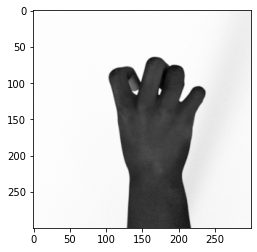

In [86]:
fig, axes = plt.subplots()
img = X_train_val[1000]
label = y_train_val[1000]
axes.imshow(img,cmap='gray')
print(classes[label])

In [87]:
X_train, X_val, y_train,y_val = train_test_split(X_train_val,y_train_val,stratify=y_train_val,test_size = 0.2,shuffle=True)

In [88]:
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,rescale=1.0/255)
train_generator = train_datagen.flow(X_train,y_train, shuffle=True)
X_val = X_val/255.0
X_test=X_test/255.0


In [89]:
X_train.shape

array([253], dtype=uint8)

In [90]:
model = Sequential([
    layers.Conv2D(64, 3, strides = 2, input_shape=(300,300,1),activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3,strides=2,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 149, 149, 64)      640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 36, 36, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [91]:
earlystop = callbacks.EarlyStopping(patience=10, restore_best_weights=True, min_delta=1e-3)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator, 
    epochs=20, 
    validation_data=(X_val,y_val), 
    callbacks=[earlystop]
)

Epoch 1/20
63/63 [==============================] - 12s 190ms/step - loss: 1.1052 - accuracy: 0.3507 - val_loss: 0.8082 - val_accuracy: 0.6607
Epoch 2/20
63/63 [==============================] - 12s 190ms/step - loss: 0.7714 - accuracy: 0.6542 - val_loss: 0.2054 - val_accuracy: 0.9722
Epoch 3/20
63/63 [==============================] - 12s 195ms/step - loss: 0.3814 - accuracy: 0.8565 - val_loss: 0.0896 - val_accuracy: 0.9782
Epoch 4/20
63/63 [==============================] - 11s 180ms/step - loss: 0.1864 - accuracy: 0.9425 - val_loss: 0.0610 - val_accuracy: 0.9921
Epoch 5/20
63/63 [==============================] - 12s 183ms/step - loss: 0.1629 - accuracy: 0.9457 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch 6/20
63/63 [==============================] - 12s 191ms/step - loss: 0.1138 - accuracy: 0.9606 - val_loss: 0.0147 - val_accuracy: 0.9980
Epoch 7/20
63/63 [==============================] - 11s 181ms/step - loss: 0.0727 - accuracy: 0.9758 - val_loss: 0.0229 - val_accuracy: 0.9921

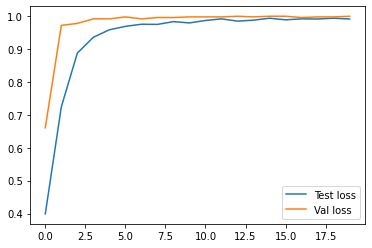

In [94]:
graph = pd.DataFrame(history.history)
plt.plot(graph[['accuracy']],label ="Test loss")
plt.plot(graph[['val_accuracy']],label ="Val loss")
plt.legend()

In [96]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f"Accuracy {100*accuracy}% ")

12/12 [==============================] - 0s 9ms/step - loss: 0.0782 - accuracy: 0.9516
Accuracy 95.16128897666931% 
